In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data_1.csv', names=["time", "x", "y", "z"])

df

,time,x,y,z
0,9403.0,-0.014591,-0.006427,0.058167
1,9403.0,-0.014590,-0.006426,0.058167
2,9419.0,-0.008283,-0.014090,0.047821
3,9420.0,-0.008283,-0.014090,0.047821
4,9436.0,-0.013733,-0.012754,0.047616
...,...,...,...,...
167,10788.0,-0.013884,0.013287,0.039069
168,10803.0,-0.027854,-0.012618,0.046111
169,10804.0,-0.027853,-0.012620,0.046110
170,10820.0,-0.022112,-0.006161,0.046560


In [3]:
_sum = 0
for cnt in range(0, len(df)-1):
    _sum += df["time"][cnt+1] - df["time"][cnt]
    
samplingRate = _sum / (len(df)-1) / 1000

samplingRate

0.008292397660818712

In [4]:
q = 0.7

cutoff = 0.01

omega = 2 * np.pi * cutoff / samplingRate
alpha = np.sin(omega) / (2 * q)

a0 = 1 + alpha
a1 = -2 * np.cos(omega)
a2 = 1 - alpha
b0 = (1 - np.cos(omega)) / 2
b1 = 1 - np.cos(omega)
b2 = (1 - np.cos(omega)) / 2

in1 = np.zeros(3)
in2 = np.zeros(3)
out1 = np.zeros(3)
out2 = np.zeros(3)

accelerationFiltered = []

for cnt in range(0, len(df)):
    _input = np.array([df["x"][cnt], df["y"][cnt], df["z"][cnt]])
    
    outputThis = (b0 / a0) * _input + (b1 / a0) * in1 + (b2 / a0) * in2 - (a1 / a0) * out1 - (a2 / a0) * out2
   
    accelerationFiltered.append(outputThis)
   
    in2 = in1
    in1 = _input

    out2 = out1
    out1 = outputThis 

compare the filtered acceleration with the raw acceleration

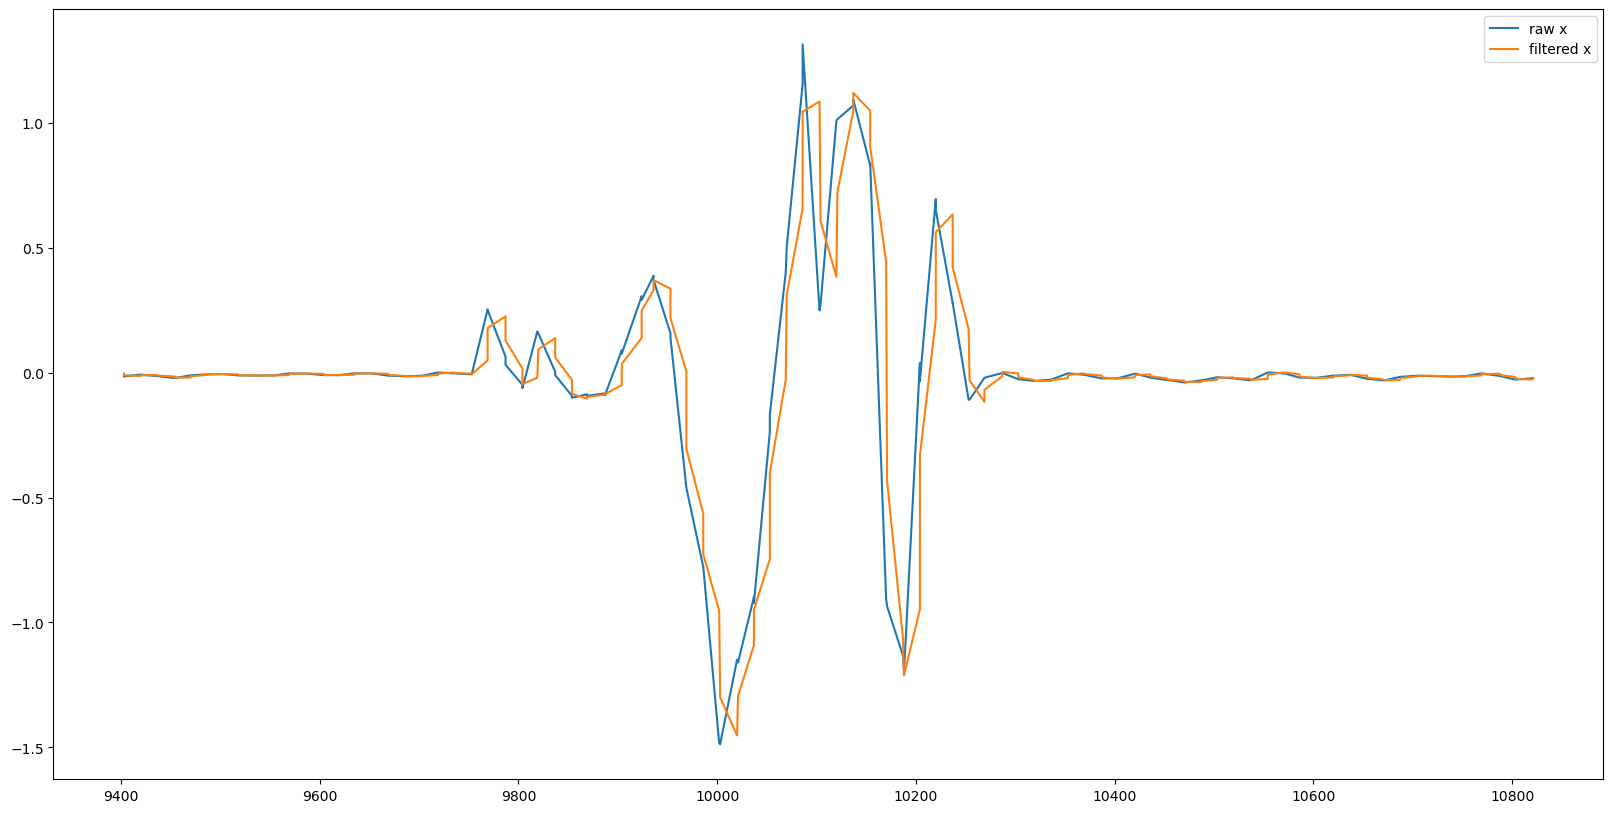

In [5]:
#x
plt.figure(figsize=(20,10))
plt.plot(df["time"], df["x"], label="raw x")
plt.plot(df["time"], [i[0] for i in accelerationFiltered], label="filtered x")
plt.legend()

velocity

In [6]:
velocity = [np.zeros(3)]

for cnt in range(0, len(df)-1):
    velocity.append(velocity[cnt] + accelerationFiltered[cnt] * samplingRate)

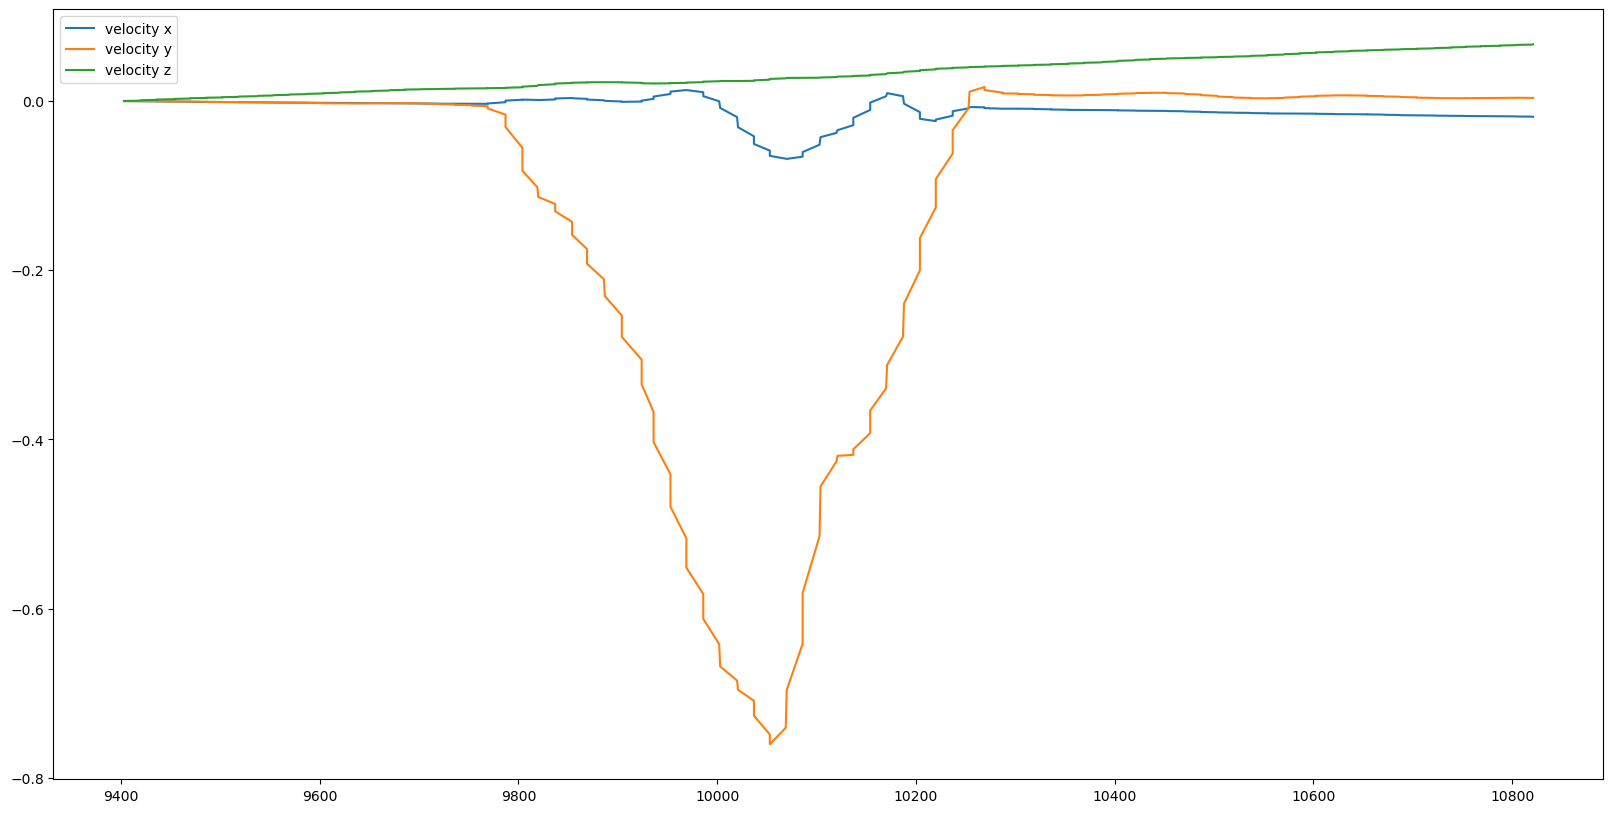

In [7]:
plt.figure(figsize=(20,10))
plt.plot(df["time"], [i[0] for i in velocity], label="velocity x")
plt.plot(df["time"], [i[1] for i in velocity], label="velocity y")
plt.plot(df["time"], [i[2] for i in velocity], label="velocity z")
plt.legend()


distance

In [8]:
distance = np.zeros(3)

for cnt in range(0, len(velocity)):
    distance += velocity[cnt] * samplingRate
    
distance

array([-0.01495009, -0.1667609 ,  0.04611033])